## Statistics & Linear Regression

### In this session you will have an opportunity to interact with the MLlib for Statistics & Linear Regression
1. Read a CSV file to a DataFrame
2. Convert to rdd
2. Do some basic Stats - mean, sd
3. Exercise on Correlation
4. Linear Regression mpg ~ .
4. Lasso & Ridge Regression

The Coding Exercises would give a good start

In [1]:
from pyspark.context import SparkContext
print "Running Spark Version %s" % (sc.version)

Running Spark Version 1.6.0


In [2]:
from pyspark.conf import SparkConf
conf = SparkConf()
print conf.toDebugString()

spark.app.name=PySparkShell
spark.files=file:/Users/ksankar/.ivy2/jars/com.databricks_spark-csv_2.10-1.3.0.jar,file:/Users/ksankar/.ivy2/jars/org.apache.commons_commons-csv-1.1.jar,file:/Users/ksankar/.ivy2/jars/com.univocity_univocity-parsers-1.5.1.jar
spark.jars=file:/Users/ksankar/.ivy2/jars/com.databricks_spark-csv_2.10-1.3.0.jar,file:/Users/ksankar/.ivy2/jars/org.apache.commons_commons-csv-1.1.jar,file:/Users/ksankar/.ivy2/jars/com.univocity_univocity-parsers-1.5.1.jar
spark.master=local[*]
spark.submit.deployMode=client
spark.submit.pyFiles=/Users/ksankar/.ivy2/jars/com.databricks_spark-csv_2.10-1.3.0.jar,/Users/ksankar/.ivy2/jars/org.apache.commons_commons-csv-1.1.jar,/Users/ksankar/.ivy2/jars/com.univocity_univocity-parsers-1.5.1.jar


In [3]:
import datetime
from pytz import timezone
print "Last run @%s" % (datetime.datetime.now(timezone('US/Pacific')))

Last run @2015-12-17 21:35:58.641509-08:00


In [4]:
df_cars = sqlContext.read.load('cars_1.parquet')

In [5]:
df_cars.count()

32

In [6]:
df_cars.show(40)

+-----+------------+---+------+------+-------+------------+---------+------+-----+------+---------+
|  mpg|displacement| hp|torque|CRatio|RARatio|CarbBarrells|NoOfSpeed|length|width|weight|automatic|
+-----+------------+---+------+------+-------+------------+---------+------+-----+------+---------+
| 18.9|       350.0|165|   260|   8.0|   2.56|           4|        3| 200.3| 69.9|  3910|        1|
| 17.0|       350.0|170|   275|   8.5|   2.56|           4|        3| 199.6| 72.9|  3860|        1|
| 20.0|       250.0|105|   185|  8.25|   2.73|           1|        3| 196.7| 72.2|  3510|        1|
|18.25|       351.0|143|   255|   8.0|    3.0|           2|        3| 199.9| 74.0|  3890|        1|
|20.07|       225.0| 95|   170|   8.4|   2.76|           1|        3| 194.1| 71.8|  3365|        0|
| 11.2|       440.0|215|   330|   8.2|   2.88|           4|        3| 184.5| 69.0|  4215|        1|
|22.12|       231.0|110|   175|   8.0|   2.56|           2|        3| 179.3| 65.4|  3020|        1|


In [7]:
df_cars = df_cars.na.drop()

In [8]:
cars_rdd = df_cars.map(lambda x:[x])

In [9]:
cars_rdd.take(1)

[[Row(mpg=18.9, displacement=350.0, hp=165, torque=260, CRatio=8.0, RARatio=2.559999942779541, CarbBarrells=4, NoOfSpeed=3, length=200.3000030517578, width=69.9000015258789, weight=3910, automatic=1)]]

In [10]:
from pyspark.mllib.stat import Statistics
summary = Statistics.colStats(cars_rdd)

In [11]:
print str(summary)

In [12]:
summary.min()

array([  1.12000000e+01,   8.53000000e+01,   7.00000000e+01,
         8.10000000e+01,   8.00000000e+00,   2.45000005e+00,
         1.00000000e+00,   3.00000000e+00,   1.55699997e+02,
         6.17999992e+01,   1.90500000e+03,   0.00000000e+00])

In [13]:
for x in summary.min():
    print "|%6.2f" % x,
print
for x in summary.mean():
    print "|%6.2f" % x,
print
for x in summary.max():
    print "|%6.2f" % x,
print

| 11.20 | 85.30 | 70.00 | 81.00 |  8.00 |  2.45 |  1.00 |  3.00 |155.70 | 61.80 |1905.00 |  0.00
| 20.04 |286.05 |136.97 |217.90 |  8.31 |  3.06 |  2.57 |  3.33 |192.34 | 71.42 |3625.80 |  0.73
| 36.50 |500.00 |223.00 |366.00 |  9.00 |  4.30 |  4.00 |  5.00 |231.00 | 79.80 |5430.00 |  1.00


### Capculate & Plot Correlations

In [14]:
hp = cars_rdd.map(lambda x: x[0][2])
weight = cars_rdd.map(lambda x: x[0][10])
print '%2.3f' % Statistics.corr(hp, weight, method="pearson")
print '%2.3f' % Statistics.corr(hp, weight, method="spearman")

0.888
0.874


In [15]:
print hp

PythonRDD[42] at RDD at PythonRDD.scala:43


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


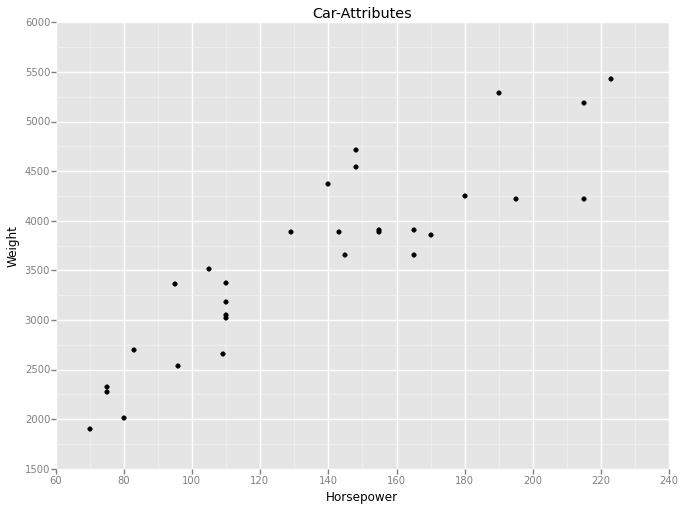

<ggplot: (278550125)>

In [16]:
import pandas as pd
from ggplot import *
%matplotlib inline

df = pd.DataFrame({'HP': hp.collect(),'Weight':weight.collect()})

ggplot(df, aes(x='HP', y='Weight')) +\
  geom_point() + labs(title="Car-Attributes", x="Horsepower", y="Weight")

### Coding Excrcise
1. Calculate the correlation between Rear Axle Ratio & the Width
2. Plot & verify

In [17]:
ra_ratio = cars_rdd.map(lambda x: x[0][5])
width = cars_rdd.map(lambda x: x[0][9])
print '%2.3f' % Statistics.corr(ra_ratio, width, method="pearson")
print '%2.3f' % Statistics.corr(ra_ratio, width, method="spearman")

-0.453
-0.244


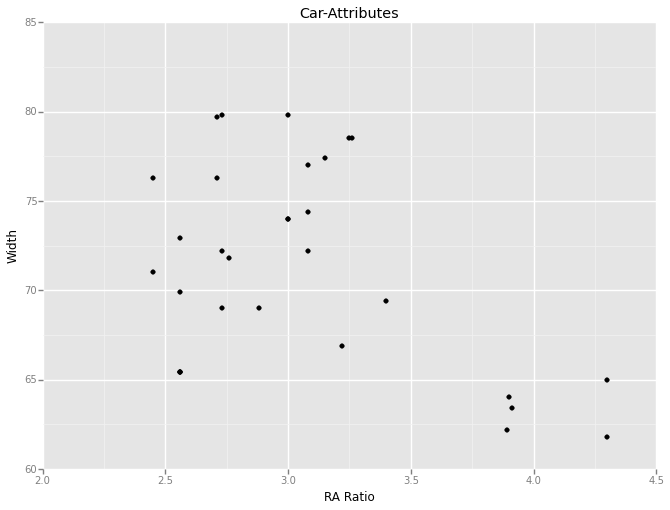

<ggplot: (275214349)>

In [18]:
df = pd.DataFrame({'RA Ratio': ra_ratio.collect(),'Width':width.collect()})

ggplot(df, aes(x='RA Ratio', y='Width')) +\
  geom_point() + labs(title="Car-Attributes", x="RA Ratio", y="Width")

# Linear Regression

In [19]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.regression import LinearRegressionWithSGD
from pyspark.mllib.regression import LassoWithSGD
from pyspark.mllib.regression import RidgeRegressionWithSGD
from numpy import array

In [20]:
data = [
   LabeledPoint(0.0, [0.0]),
   LabeledPoint(10.0, [10.0]),
   LabeledPoint(20.0, [20.0]),
   LabeledPoint(30.0, [30.0])
]
lrm = LinearRegressionWithSGD.train(sc.parallelize(data), initialWeights=array([1.0]))
print lrm
print lrm.weights
print lrm.intercept
lrm.predict([40])

(weights=[1.0], intercept=0.0)
[1.0]
0.0


40.0

In [21]:
data_test = [
   LabeledPoint(5.0, [5.0]),
   LabeledPoint(15.0, [15.0]),
   LabeledPoint(25.0, [25.0]),
   LabeledPoint(35.0, [35.0])
]
data_test_rdd = sc.parallelize(data_test)
valuesAndPreds = data_test_rdd.map(lambda p: (p.label, lrm.predict(p.features)))
#
MSE = valuesAndPreds.map(lambda (v, p): (v - p)**2).reduce(lambda x, y: x + y) / valuesAndPreds.count()
print("Mean Squared Error = " + str(MSE))

Mean Squared Error = 0.0


In [22]:
valuesAndPreds.take(10)

[(5.0, 5.0), (15.0, 15.0), (25.0, 25.0), (35.0, 35.0)]

### TIP : Step Size is important

In [23]:
data = [
   LabeledPoint(0.0, [0.0]),
   LabeledPoint(9.0, [10.0]),
   LabeledPoint(22.0, [20.0]),
   LabeledPoint(32.0, [30.0])
]
lrm = LinearRegressionWithSGD.train(sc.parallelize(data), initialWeights=array([1.0])) # should be 1.09x -0.60
        # Default step size of 1.0 will diverge
print "Step Size 1.0 (Default)"
print lrm
print lrm.weights
print lrm.intercept
print "%3.3f" % lrm.predict([40])
lrm = LinearRegressionWithSGD.train(sc.parallelize(data), initialWeights=array([1.0]), step=0.01) # should be 1.09x -0.60
        # Default step size of 1.0 will diverge
print
print "Step Size 0.01"
print lrm
print lrm.weights
print lrm.intercept
print "%3.3f" % lrm.predict([40])

Step Size 1.0 (Default)
(weights=[-2.4414455467e+173], intercept=0.0)
[-2.4414455467e+173]
0.0
-9765782186791751487210715088039060352220111253693716482748893621300180659099465516818172090556066502587581239328158959270667383329208729580664342023823383430423411112418476032.000

Step Size 0.01
(weights=[1.06422568888], intercept=0.0)
[1.06422568888]
0.0
42.569


Step Size 1.0 (Default)
(weights=[-2.4414455467e+173], intercept=0.0)
[-2.4414455467e+173]
0.0
-9765782186791751487210715088039060352220111253693716482748893621300180659099465516818172090556066502587581239328158959270667383329208729580664342023823383430423411112418476032.000

Step Size 0.01
(weights=[1.06428571429], intercept=0.0)
[1.06428571429]
0.0
42.571

In [24]:
data = [
   LabeledPoint(18.9, [3910.0]),
   LabeledPoint(17.0, [3860.0]),
   LabeledPoint(20.0, [4200.0]),
   LabeledPoint(16.6, [3660.0])
]
lrm = LinearRegressionWithSGD.train(sc.parallelize(data), step=0.00000001) # should be ~ 0.006582x -7.595170
print lrm
print lrm.weights
print lrm.intercept
lrm.predict([4000])

(weights=[0.00113630278963], intercept=0.0)
[0.00113630278963]
0.0


4.5452111585342161

(weights=[0.00439009869891], intercept=0.0)
[0.00439009869891]
0.0
Out[57]:
17.560394795638977

### Homework 

1.  Convert the car data to labelled points
2.  Partition to Train & Test
3.  Train the three Linear Models
4.  Calculate the MSE for the three models

In [25]:
from pyspark.mllib.regression import LabeledPoint
def parse_car_data(x):
    # return labelled point
    return LabeledPoint(x[0][0],[ x[0][1],x[0][2],x[0][3],x[0][4],x[0][5],
                                 x[0][6],x[0][7],x[0][8],x[0][9],x[0][10],x[0][11] ]) 

In [26]:
car_rdd_lp = cars_rdd.map(lambda x: parse_car_data(x))
print car_rdd_lp.count()
print car_rdd_lp.first().label
print car_rdd_lp.first().features

30
18.9
[350.0,165.0,260.0,8.0,2.55999994278,4.0,3.0,200.300003052,69.9000015259,3910.0,1.0]


30
18.9
[350.0,165.0,260.0,8.0,2.55999994278,4.0,3.0,200.300003052,69.9000015259,3910.0,1.0]

In [27]:
car_rdd_train = car_rdd_lp.filter(lambda x: x.features[9] <= 4000)
car_rdd_train.count()

21

In [28]:
car_rdd_test = car_rdd_lp.filter(lambda x: x.features[9] > 4000)
car_rdd_test.count()

9

In [29]:
car_rdd_train.take(5)

[LabeledPoint(18.9, [350.0,165.0,260.0,8.0,2.55999994278,4.0,3.0,200.300003052,69.9000015259,3910.0,1.0]),
 LabeledPoint(17.0, [350.0,170.0,275.0,8.5,2.55999994278,4.0,3.0,199.600006104,72.9000015259,3860.0,1.0]),
 LabeledPoint(20.0, [250.0,105.0,185.0,8.25,2.73000001907,1.0,3.0,196.699996948,72.1999969482,3510.0,1.0]),
 LabeledPoint(18.25, [351.0,143.0,255.0,8.0,3.0,2.0,3.0,199.899993896,74.0,3890.0,1.0]),
 LabeledPoint(20.07, [225.0,95.0,170.0,8.39999961853,2.75999999046,1.0,3.0,194.100006104,71.8000030518,3365.0,0.0])]

In [30]:
car_rdd_test.take(5)

[LabeledPoint(11.2, [440.0,215.0,330.0,8.19999980927,2.88000011444,4.0,3.0,184.5,69.0,4215.0,1.0]),
 LabeledPoint(14.39, [500.0,190.0,360.0,8.5,2.73000001907,4.0,3.0,224.100006104,79.8000030518,5290.0,1.0]),
 LabeledPoint(14.89, [440.0,215.0,330.0,8.19999980927,2.71000003815,4.0,3.0,231.0,79.6999969482,5185.0,1.0]),
 LabeledPoint(21.47, [360.0,180.0,290.0,8.39999961853,2.45000004768,2.0,3.0,214.199996948,76.3000030518,4250.0,1.0]),
 LabeledPoint(13.27, [460.0,223.0,366.0,8.0,3.0,4.0,3.0,228.0,79.8000030518,5430.0,1.0])]

In [31]:
lrm = LinearRegressionWithSGD.train(car_rdd_train, step=0.000000001)
print lrm
print lrm.weights
print lrm.intercept

(weights=[8.11072950552e-06,4.14633541026e-06,6.27810335684e-06,3.15562441646e-07,1.22320305491e-07,8.45124800836e-08,1.3615654074e-07,6.75151091991e-06,2.56129455117e-06,0.000113306981996,1.98901376993e-08], intercept=0.0)
[8.11072950552e-06,4.14633541026e-06,6.27810335684e-06,3.15562441646e-07,1.22320305491e-07,8.45124800836e-08,1.3615654074e-07,6.75151091991e-06,2.56129455117e-06,0.000113306981996,1.98901376993e-08]
0.0


In [32]:
valuesAndPreds = car_rdd_test.map(lambda p: (p.label, lrm.predict(p.features)))
MSE = valuesAndPreds.map(lambda (v, p): (v - p)**2).reduce(lambda x, y: x + y) / valuesAndPreds.count()
print("Mean Squared Error = " + str(MSE))

Mean Squared Error = 221.828342627


1.6.0 (12/17/15) : Mean Squared Error = 221.828342627

In [33]:
valuesAndPreds.take(20)

[(11.2, 0.48554697571066902),
 (14.39, 0.60821840802580751),
 (14.89, 0.59579607855427175),
 (21.47, 0.48868667464795085),
 (13.27, 0.623957660110387),
 (19.73, 0.50156476487723733),
 (13.9, 0.52105933272680516),
 (13.27, 0.54089210674711874),
 (13.77, 0.4847844581987511)]

In [34]:
lrm = LassoWithSGD.train(car_rdd_train, step=0.000000001)
print lrm.weights
print lrm.intercept
valuesAndPreds = car_rdd_test.map(lambda p: (p.label, lrm.predict(p.features)))
MSE = valuesAndPreds.map(lambda (v, p): (v - p)**2).reduce(lambda x, y: x + y) / valuesAndPreds.count()
print("Mean Squared Error = " + str(MSE))

[8.11071244174e-06,4.14631834266e-06,6.27808629129e-06,3.15545370813e-07,1.22303234508e-07,8.44954090843e-08,1.36139469766e-07,6.75149385406e-06,2.56127748206e-06,0.000113306965018,1.98730666514e-08]
0.0
Mean Squared Error = 221.828345519


[7.99133570468e-05,4.11481587054e-05,6.19949476655e-05,3.16472476808e-06,1.2330557013e-06,8.41105433668e-07,1.37323711608e-06,6.74789184347e-05,2.56204587207e-05,0.00112604747864,1.93481200483e-07]
0.0
Mean Squared Error = 105.857623024

In [35]:
valuesAndPreds.take(20)

[(11.2, 0.48554688268746388),
 (14.39, 0.60821829477954303),
 (14.89, 0.59579596808920543),
 (21.47, 0.48868658308221813),
 (13.27, 0.6239575444415133),
 (19.73, 0.50156467324591592),
 (13.9, 0.5210592376727341),
 (13.27, 0.540892008711505),
 (13.77, 0.48478436690721849)]

In [36]:
lrm = RidgeRegressionWithSGD.train(car_rdd_train, step=0.000000001)
print lrm.weights
print lrm.intercept
valuesAndPreds = car_rdd_test.map(lambda p: (p.label, lrm.predict(p.features)))
MSE = valuesAndPreds.map(lambda (v, p): (v - p)**2).reduce(lambda x, y: x + y) / valuesAndPreds.count()
print("Mean Squared Error = " + str(MSE))

[8.11072950549e-06,4.14633541025e-06,6.27810335682e-06,3.15562441645e-07,1.2232030549e-07,8.45124800833e-08,1.36156540739e-07,6.75151091989e-06,2.56129455116e-06,0.000113306981996,1.98901376992e-08]
0.0
Mean Squared Error = 221.828342627


[7.99135412894e-05,4.11483438146e-05,6.19951323091e-05,3.16491061092e-06,1.233241578e-06,8.41291314154e-07,1.37342299073e-06,6.74791031461e-05,2.56206441717e-05,0.00112604764338,1.93667092004e-07]
0.0
Mean Squared Error = 105.85760396

## That is All Folks !